### Scikit-learn을 이용한 머신러닝 학습 가이드!

- scikit-learn(sklearn)을 완전히 사용해서 end-to-end로 학습시키는 코드를 완성해봅니다!

- 너무나 유명한 california house pricing 데이터를 이용하여 회귀분석 예제 코드를 만들어봅시다.


> Data Load - Data Preprocessing - Fit - Evalution - Predict

In [ ]:
!pip install sklearn

In [5]:
# Hands-on!!
from sklearn.datasets import fetch_california_housing


X = fetch_california_housing(as_frame=True).data #X fetch_ 함수에서.data를 활용하여 데이터프레임으로 만들 수 있다.
y = fetch_california_housing(as_frame=True).target #y
#fetch_california_housing(as_frame=True).frame# X ,y

print(X.shape, y.shape)

(20640, 8) (20640,)


### Data Preprocessing + EDA



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


<function matplotlib.pyplot.show>

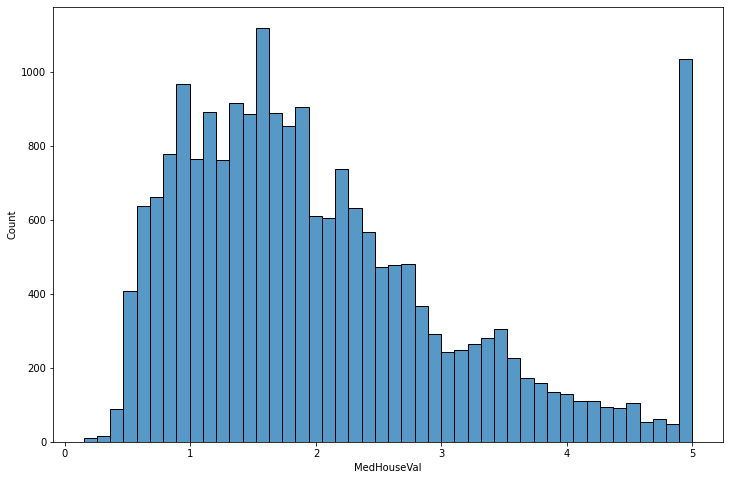

In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#1.결측치 확인
#2.dtype이 object인 column이 있는지 확인 -> categorical feature확인

X.info()
#X[X.isnull().any(axis=1)] : 결측치가 있다면 보여주세요

#3.target distribution

plt.figure(figsize=(12,8))
sns.histplot(y)
plt.show

In [11]:
#train_test_split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


### Training(Fit)

In [14]:
#1.사용할 함수를 불러온다
from sklearn.linear_model import LinearRegression
#2. 사용할 함수의 객체를 생성한다.
reg = LinearRegression()
#3. 학습
reg.fit(X_train,y_train)#회귀는 지도학습부분이기에 y부분 ㅊ필요

LinearRegression()

### Evaluation

In [16]:
#학습 결과를 확인(평가 지표.)
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train) #y_hat
pred

array([1.72441662, 2.34061463, 0.80938884, ..., 1.95650644, 1.54009365,
       2.79819134])

In [17]:
print("MSE: %.4f" % mean_squared_error(y_train, pred))
print("R2: %.4f" % r2_score(y_train,pred))

MSE: 0.5283
R2: 0.6021



### Prediction

In [19]:
result = reg.predict(X_test)
print("MSE: %.4f" % mean_squared_error(y_test, result))
print("R2: %.4f" % r2_score(y_test, result))
#prediction이 올랐다는 것은 train시 개선의 가능성이 있다는 것이다.

MSE: 0.5089
R2: 0.6223


### Light GBM

In [22]:
from lightgbm.sklearn import LGBMRegressor
reg2 = LGBMRegressor()

reg2.fit(X_train,y_train)

pred2 = reg2.predict(X_train)

In [23]:
print("MSE: %.4f" % mean_squared_error(y_train, pred2))
print("R2: %.4f" % r2_score(y_train,pred2))

MSE: 0.1568
R2: 0.8819


In [25]:
result2 = reg2.predict(X_test)
print("MSE: %.4f" % mean_squared_error(y_test, result2))
print("R2: %.4f" % r2_score(y_test,result2))

MSE: 0.2058
R2: 0.8472
